# Titanic - with Decision Tree

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Titanica Dataset

In [8]:
df_titanic = pd.read_csv('titanic.csv')

# Some Data Exploration

### How many Survived and Deads?

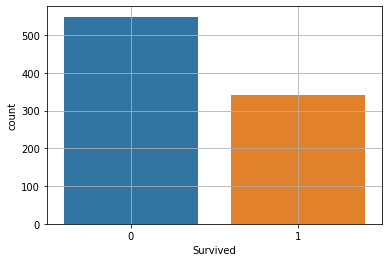

In [9]:
sns.countplot(data=df_titanic, x='Survived')
plt.grid()

### How many male and female?

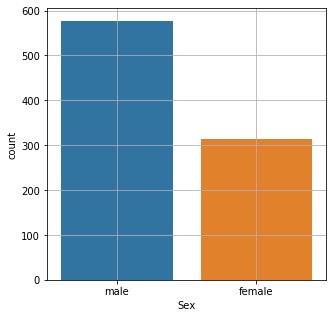

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes()
sns.countplot(data=df_titanic, x='Sex', ax=ax)
plt.grid()

### Plot the distribution of the Fare based on classes

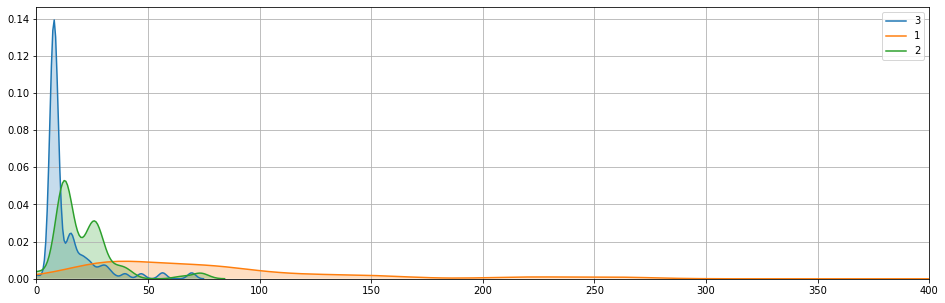

In [11]:
fig = plt.figure(figsize=(16, 5))
for class_ in df_titanic['Pclass'].unique():
    sns.kdeplot(df_titanic[df_titanic['Pclass']==class_]['Fare'], 
                label=class_, shade=True)
plt.xlim(0,400)
plt.grid()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic.drop('Survived', axis=1), 
                                                    df_titanic['Survived'], 
                                                    stratify=df_titanic['Survived'])

# random_state to get the same random split could be introduced here as well

In [14]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C
249,250,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S
595,596,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.150,NaN,S
526,527,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.500,NaN,S
770,771,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.500,NaN,S


# Check the ratio of Survived in train and test sets

### Is it true that the % of survived in Train is similar to the % of Survived in the Test?

In [15]:
# Check the % of Survived in y_train and y_test
ratio_train = 100 * y_train.sum() / len(y_train)
print(ratio_train)

38.32335329341317


In [16]:
ratio_test = 100 * y_test.sum() / len(y_test)
print(ratio_test)

38.56502242152467


## Plot the number of Survived and Dead people in y_train and y_test

In [17]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Check the distributions of the train and test features in train and test sets

In [18]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,531.000000,668.000000,668.000000,668.000000
mean,448.091317,2.323353,29.923089,0.519461,0.383234,30.572317
std,257.844576,0.830595,14.935665,1.101142,0.804683,46.180843
min,1.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,222.500000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.500000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,678.250000,3.000000,39.000000,1.000000,0.000000,30.500000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
X_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,223.000000,223.000000,183.000000,223.000000,223.000000,223.000000
mean,439.735426,2.264574,29.049235,0.533632,0.376682,37.092564
std,256.353548,0.852633,13.285423,1.109942,0.811957,58.824828
min,3.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,227.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,443.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,629.500000,3.000000,36.000000,1.000000,0.000000,35.077100
max,891.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [20]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
X_train.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          521
Embarked         2
dtype: int64

In [22]:
feat_to_use = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']

def feature_selector(df, feature_list):
    return df[feature_list].copy()

In [23]:
X_train = feature_selector(X_train, feat_to_use)

In [24]:
X_train.isnull().sum(axis=0)

Pclass    0
SibSp     0
Parch     0
Fare      0
Sex       0
dtype: int64

# One hot encoding of Sex

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
sex_encoded = ohe.fit_transform(X_train[['Sex']])

df = pd.DataFrame(sex_encoded)
df.columns = list(ohe.categories_[0])

X_train = pd.concat([X_train.reset_index(drop=True), df], axis=1)
X_train = X_train.drop('Sex', axis=1) # dies ist besser als 0/1 über einer Spalte, da damit eine Wertung, dass Frauen mit 1
# besser ist als männer z.b. mit 0, damit wird indirekt eine ordnung mitgegeben. (dieser Vorgang wird encoding bezeichnet)

In [26]:
X_train

,Pclass,SibSp,Parch,Fare,female,male
0,3,0,0,7.2250,0.0,1.0
1,2,1,0,26.0000,0.0,1.0
2,3,1,1,24.1500,0.0,1.0
3,2,0,0,10.5000,1.0,0.0
4,3,0,0,9.5000,0.0,1.0
5,1,0,0,35.0000,0.0,1.0
6,3,0,0,8.4333,0.0,1.0
7,3,0,0,7.8542,0.0,1.0
8,3,0,0,7.7500,1.0,0.0
9,3,0,0,8.0500,0.0,1.0


# Use a DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
model = DecisionTreeClassifier(max_depth=4) # die maximale tiefe die der Decision Tree annehmen darf. 

In [29]:
y_train.shape

(668,)

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Evaluation of the model with cross validation

In [31]:
from sklearn.model_selection import cross_validate
pd.DataFrame(cross_validate(model, X_train, y_train, cv=5))

# test_score tells the accuracy of the model 1 is great 0 bad

,fit_time,score_time,test_score
0,0.005014,0.002007,0.748148
1,0.005012,0.002007,0.708955
2,0.004009,0.003009,0.789474
3,0.004012,0.002002,0.796992
4,0.004013,0.002004,0.812030


# Are we happy? Try with GridSearch for Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid={'max_depth': np.arange(1, 10, 2), 
                                       'min_samples_leaf': np.arange(40,50)}, cv=5)
grid.fit(X_train, y_train);

In [33]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 41}

# Ok we found the best hyperparameters for the tree!

In [ ]:
!pip install graphviz
#!pip install graphviz
import graphviz

In [35]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
                     class_names=X_train.columns,  
                     feature_names=X_train.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Evaluation on test set

In [138]:
def one_hot_encoding_test_set(test_set, one_hot_enc):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse=False)
    sex_encoded = ohe.fit_transform(test_set[['Sex']])

    df = pd.DataFrame(sex_encoded)
    df.columns = list(ohe.categories_[0])

    test_set = pd.concat([test_set.reset_index(drop=True), df], axis=1)
    test_set = test_set.drop('Sex', axis=1)
    return test_set

In [139]:
feat_to_use = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']
X_test = feature_selector(X_test, feat_to_use)

In [140]:
X_test

,Pclass,SibSp,Parch,Fare,Sex
317,2,0,0,14.0000,male
766,1,0,0,39.6000,male
560,3,0,0,7.7500,male
113,3,1,0,9.8250,female
768,3,1,0,24.1500,male
326,3,0,0,6.2375,male
55,1,0,0,35.5000,male
610,3,1,5,31.2750,female
359,3,0,0,7.8792,female
152,3,0,0,8.0500,male


In [141]:
X_test = one_hot_encoding_test_set(X_test, label_bin)

NameError: name 'label_bin' is not defined

In [142]:
predictions = model.predict(X_test)

ValueError: could not convert string to float: 'male'

In [1431]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       137
           1       0.71      0.72      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



A more elaborated study is found here: PLEASE FIND THE COMPLETE EXAMPLE HERE: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8